<h1>Airlines Stocks Visualization</h1>

<h2>Preparations</h2>


In [18]:
#install libraries
import pandas_datareader.data as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.formula.api import ols
import pandas
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [19]:
#'AAL': American Airlines Group Inc
#'UAL': United Airlines Holdings Inc
#'DAL': Delta Air Lines, Inc
#'ALK': Alaska Air Group, Inc
#'SAVE': Spirit Airlines Incorporated
tickers = ['AAL', 'UAL', 'DAL', 'ALK', 'SAVE']

In [20]:
#possible for the user to change stock symbols, confidence levels, etc., by changing variables
ticker = 'SAVE'
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 7, 1)
price = pd.DataReader(ticker, 'yahoo', start=start, end=end)
price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,40.509998,39.500000,39.720001,40.310001,796000,40.310001
2020-01-02,40.930000,40.099998,40.700001,40.650002,1027400,40.650002
2020-01-03,39.930000,38.330002,39.660000,39.820000,1327700,39.820000
2020-01-06,40.540001,39.049999,39.299999,40.389999,1003500,40.389999
2020-01-07,40.380001,39.220001,40.220001,39.500000,866700,39.500000


<h2>Project Capabilities</h2>

<h4>Given one stock symbol</h4>

<h5>1. Displays histograms of log-returns by stock symbol</h5>

Avg daily return is -0.2193%


Text(0, 0.5, 'Index Daily Returns')

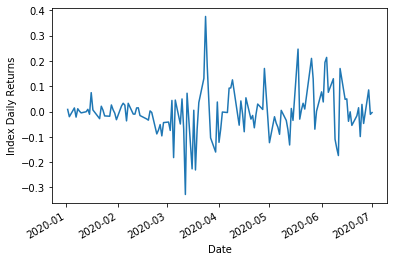

In [22]:
#first we calculate daily returns
daily_returns = price['Close'].pct_change()
print("Avg daily return is {:.4f}%".format(daily_returns.mean()*100))
_ = daily_returns.plot()
plt.ylabel('Index Daily Returns')
plt.title (ticker + ' Return Time Series')
plt.legend()
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()
_1 = daily_returns.hist(bins=30)
plt.title(ticker + ' Daily Return')
plt.show()

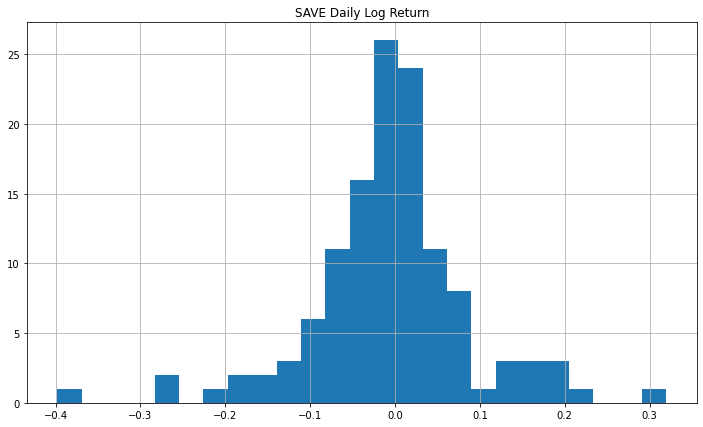

In [241]:
#then we calculate log returns
daily_log_returns = np.log(daily_returns+1)
_1 = daily_log_returns.hist(bins=25)
plt.title(ticker + ' Daily Log Return')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

<h5>2. Display a normal probability plot to see if the data is approximately normal</h5>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean is -0.0066
Standard Deviation is 0.0941


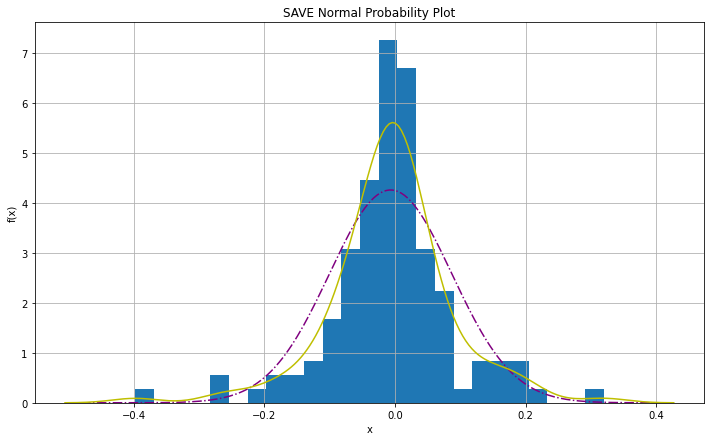

In [242]:
_1 = daily_log_returns.hist(bins=25, density=1)
sns.distplot(daily_log_returns, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'purple','label':'fitted normal density','linestyle':'-.'}) # fitted normal density
sns.kdeplot(daily_log_returns, color="y", label="actual density") # actual density
mean = np.mean(daily_log_returns)
std = np.std(daily_log_returns)
print("Mean is {:.4f}".format(daily_log_returns.mean()))
print("Standard Deviation is {:.4f}".format(daily_log_returns.std()))
plt.title(ticker + ' Normal Probability Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()

<h5>3. Create (approximate) confidence intervals for the meansand  variances  given  a  confidence  level</h5>



In [243]:
#Using t-test for confidence interval of mean with alpha = 0.05
confidence_level = 0.95
df = daily_log_returns.size - 1
confidence_interval = st.t.interval(confidence_level, df, mean, std)

print("confidence intervals of mean is",confidence_interval)

#Using chi-square test for confidence interval of variance with alpha = 0.05
confidence_level = 0.05
df = daily_log_returns.size - 1
variance = std*std

upper = df * variance / stats.chi2.ppf(confidence_level / 2, df)
lower = df * variance / stats.chi2.ppf(1 - confidence_level / 2, df)

print("confidence intervals of variance is", (lower, upper))

confidence intervals of mean is (-0.1920866458106229, 0.17881079334241023)
confidence intervals of variance is (0.006953423477557154, 0.011438945780964683)


<h5>4. Perform a regression Perform  a  regression  of  the  log-return  on  time</h5>

In [244]:
X = sm.add_constant(price.index.factorize()[0][1:])
y = daily_log_returns[1:]
model = sm.OLS(y,X)
result = model.fit()
print('slope estimate:',round(result.params[1],4))
print('intercept estimate:',round(result.params[0],4))
print('R-squared:',round(result.rsquared,4))
# print(result.summary())

slope estimate: 0.0002
intercept estimate: -0.0215
R-squared: 0.0082


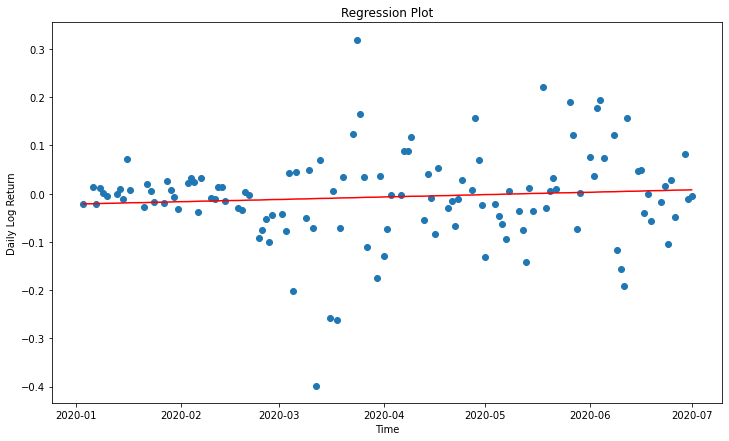

In [245]:
# diagram of the data with the least-squares line
plt.scatter(price.index[1:], y)
plt.title ('Regression Plot')
plt.xlabel('Time')
plt.ylabel('Daily Log Return')
plt.plot(price.index[1:], result.fittedvalues, c='red')

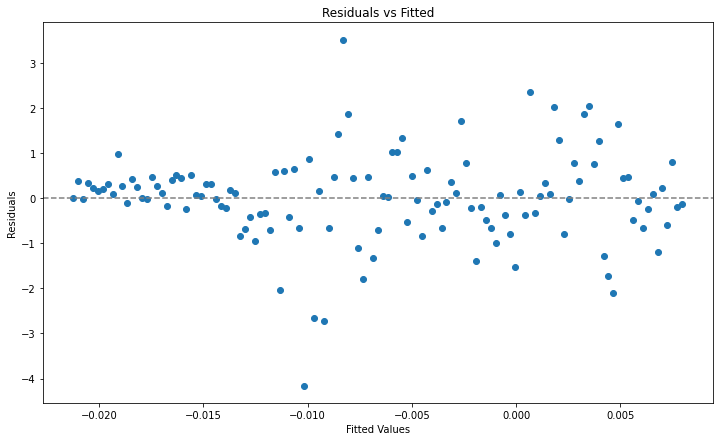

In [246]:
# Plot Residuals vs Fitted graph
# Here we use standardized residuals
residsvfitted = plt.plot(result.fittedvalues, preprocessing.scale(result.resid), 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)

<h4>Given two stock symbols</h4>

<h5>1. Test the equality of the two population means</h5>

In [247]:
# ticker_1 and ticker_2 could be changed
ticker_1 = 'AAL'
ticker_2 = 'UAL'

In [248]:
# t-test for the 2 populations
price_1 = pd.DataReader(ticker_1, 'yahoo', start=start, end=end)['Close']
price_2 = pd.DataReader(ticker_2, 'yahoo', start=start, end=end)['Close']
daily_log_returns_1 = np.log(price_1.pct_change()+1)[1:]
daily_log_returns_2 = np.log(price_2.pct_change()+1)[1:]
r = stats.ttest_ind(daily_log_returns_1, daily_log_returns_2)
print("statistic:", round(r.__getattribute__("statistic"),4))
print("pvalue:", round(r.__getattribute__("pvalue"),4))

statistic: 0.1047
pvalue: 0.9167


<h5>2. Perform a regression of one log-return on the other</h5>

In [249]:
df = pandas.DataFrame(columns=[f'{ticker_1}',f'{ticker_2}'])
df[f'{ticker_1}'] = daily_log_returns_1
df[f'{ticker_2}'] = daily_log_returns_2
# X = sm.add_constant(np.array(daily_log_returns_1))
# y = np.array(daily_log_returns_2)
model = ols(formula = f'{ticker_2} ~ {ticker_1}',data = df)
result = model.fit()
if result.params[0] < 0:
    sign = '-'
else:
    sign = '+'
print(ticker_2 + ' = '+ str(round(result.params[1],4)) + ' * ' + ticker_1 + f' {sign} ' + str(round(abs(result.params[0]),4)))
print('slope estimate:',round(result.params[1],4))
print('intercept estimate:',round(result.params[0],4))
print('R-squared:',round(result.rsquared,4))
# print(result.summary())

UAL = 0.8782 * AAL - 0.0019
slope estimate: 0.8782
intercept estimate: -0.0019
R-squared: 0.7046


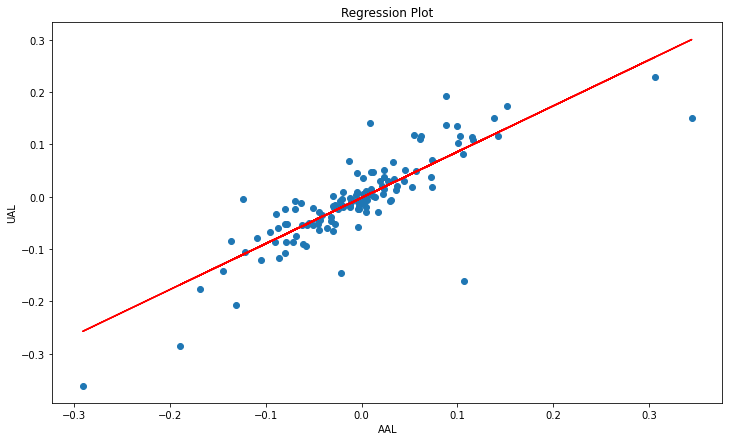

In [250]:
# diagram of the data with the least-squares line
plt.scatter(df[f'{ticker_1}'], df[f'{ticker_2}'])
plt.title ('Regression Plot')
plt.xlabel(f'{ticker_1}')
plt.ylabel(f'{ticker_2}')
plt.plot(df[f'{ticker_1}'], result.fittedvalues, c='red')

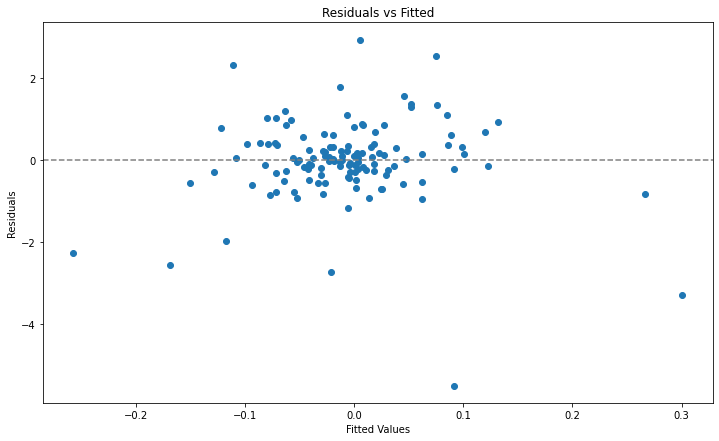

In [251]:
# Plot Residuals vs Fitted graph
# Here we use standardized residuals
residsvfitted = plt.plot(result.fittedvalues, preprocessing.scale(result.resid), 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)

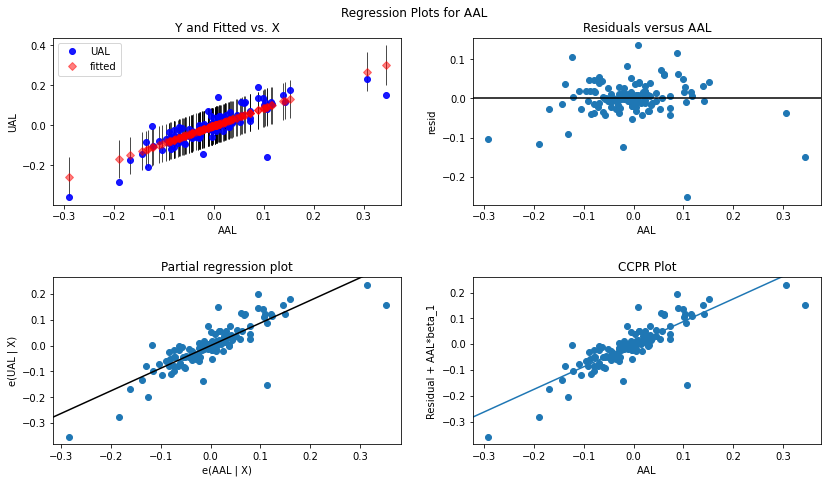

In [252]:
# the top right is Residuals vs Predictor graph
fig = sm.graphics.plot_regress_exog(result, f'{ticker_1}')
fig.tight_layout(pad=2.5)

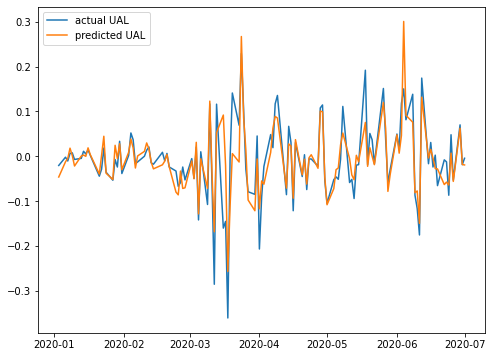

In [253]:
#  Prediction visualization on time series
fig, ax = plt.subplots(figsize=(8,6))
ln1, = ax.plot(df[f'{ticker_2}'])
ln2, = ax.plot(result.fittedvalues)
ax.legend([ln1, ln2], [f'actual {ticker_2}', f'predicted {ticker_2}'], loc='upper left', scatterpoints=1)

In [2]:
import pandas_datareader.data as pd
import numpy as np
from scipy import stats
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 7, 1)
# ticker_1 and ticker_2 could be changed
ticker_1 = 'AAL'
ticker_2 = 'UAL'
# t-test for the 2 populations
price_1 = pd.DataReader(ticker_1, 'yahoo', start=start, end=end)['Close']
price_2 = pd.DataReader(ticker_2, 'yahoo', start=start, end=end)['Close']
daily_log_returns_1 = np.log(price_1.pct_change()+1)[1:]
daily_log_returns_2 = np.log(price_2.pct_change()+1)[1:]
r = stats.ttest_ind(daily_log_returns_1, daily_log_returns_2)
print("statistic:", round(r.__getattribute__("statistic"),4))
print("pvalue:", round(r.__getattribute__("pvalue"),4))

statistic: 0.1013
pvalue: 0.9194
